Olá.

Boa tarde tudo bem?

Meu nome é Eduardo tenho 30 anos, estou buscando conhecimentos e uma oportunidade na área de dados. Achei o desafio difícil, já tinha mexido com power Bi mas nunca tinha feito ou tentado fazer uma análise preditiva.

Eu tentei montar a análise preditiva com o Big Query mas ao consultar os resultados ao fazer o treinamento teve muitas perdas onde então acabou não puxanado nenhum dado para fazer as previsões.

Abaixo segue os códigos do que eu tentei fazer para a análise preditiva.

In [ ]:
## Aqui então eu fiz toda a importação da tabela train para o big query e separei 20800 linhas para treinamento sendo 70% para treinar.
##Salvei esses dados como uma tabela treinando e então montei o código utilizando meu dataset e faznedo a consulta em cima dessa tabela treinando
## para termos o inicio da aprendizagem para posteriormente testarmos

CREATE OR REPLACE MODEL`xenon-aspect-393104.novo.iniciando_treinamento`
OPTIONS
(model_type='linear_reg',
 input_label_cols=['preco'],
  OPTIMIZE_STRATEGY = 'AUTO_STRATEGY'
) AS

SELECT

marca, modelo, versao, ano_de_fabricacao, cambio, tipo, tipo_vendedor, cidade_vendedor, estado_vendedor,
anunciante, preco


FROM `xenon-aspect-393104.novo.treinando`

In [ ]:
## Aqui estava tentando fazer então
SELECT
*
FROM
  ML.EVALUATE(MODEL`xenon-aspect-393104.novo.iniciando_treinamento`,
  # ML.CONFUSION_MATRIX(MODEL `xenon-aspect-393104.novo.iniciando_treinamento`,
  # ML.ROC_CURVE(MODEL`xenon-aspect-393104.novo. iniciando_treinamento`)
 (
SELECT

marca,
modelo,
versao,
ano_de_fabricacao,
cambio,
tipo,
tipo_vendedor,
cidade_vendedor,
estado_vendedor,
anunciante,
preco

FROM`xenon-aspect-393104.novo.testando`))


Os resultados da consulta ficaram assim conforme as imagens com varias perdas:

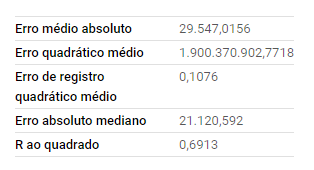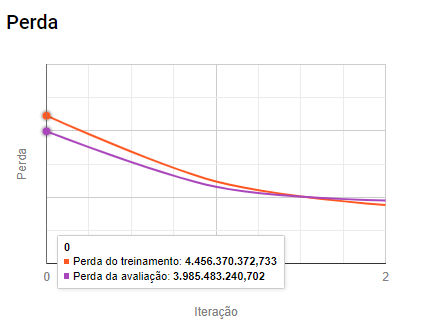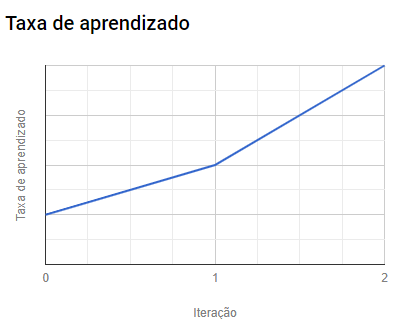

In [ ]:
## Aqui então peguei o restante dos dados que foram os 30% restantes das linhas para ser utilizado com tabela para teste
## Fiz a consulta colocando o código abaixo para testar então sua aprendizagem.
SELECT
*
FROM
  ML.EVALUATE(MODEL`xenon-aspect-393104.novo.iniciando_treinamento`,
 (
SELECT

marca,
modelo,
versao,
ano_de_fabricacao,
cambio,
tipo,
tipo_vendedor,
cidade_vendedor,
estado_vendedor,
anunciante,
preco

FROM`xenon-aspect-393104.novo.testando`))

Os Resultados foram os seguintes:

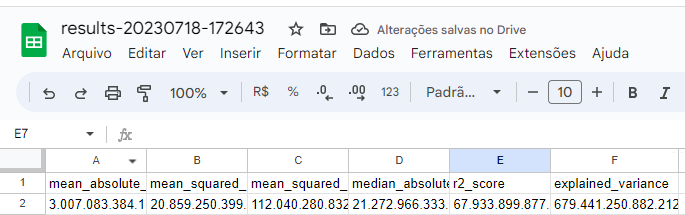

 Conforme mostrados os dados, vimos que não consegui finalizar a projeção de preços conforme o desafio.

 Segui então para a criação dos gráficos com o Qlik sense onde contém:

*Tabela com marca estado vendedor cambio tipo e se possui garantia de fábrica;

*Totais de veículos;

*Histograma de variações de preços;

*Quantidade de carros por Marca;

*Percentual de carros por cor;

*Quantidade de carros por tipo;

*quantidade de carros por tipo_vendedor.
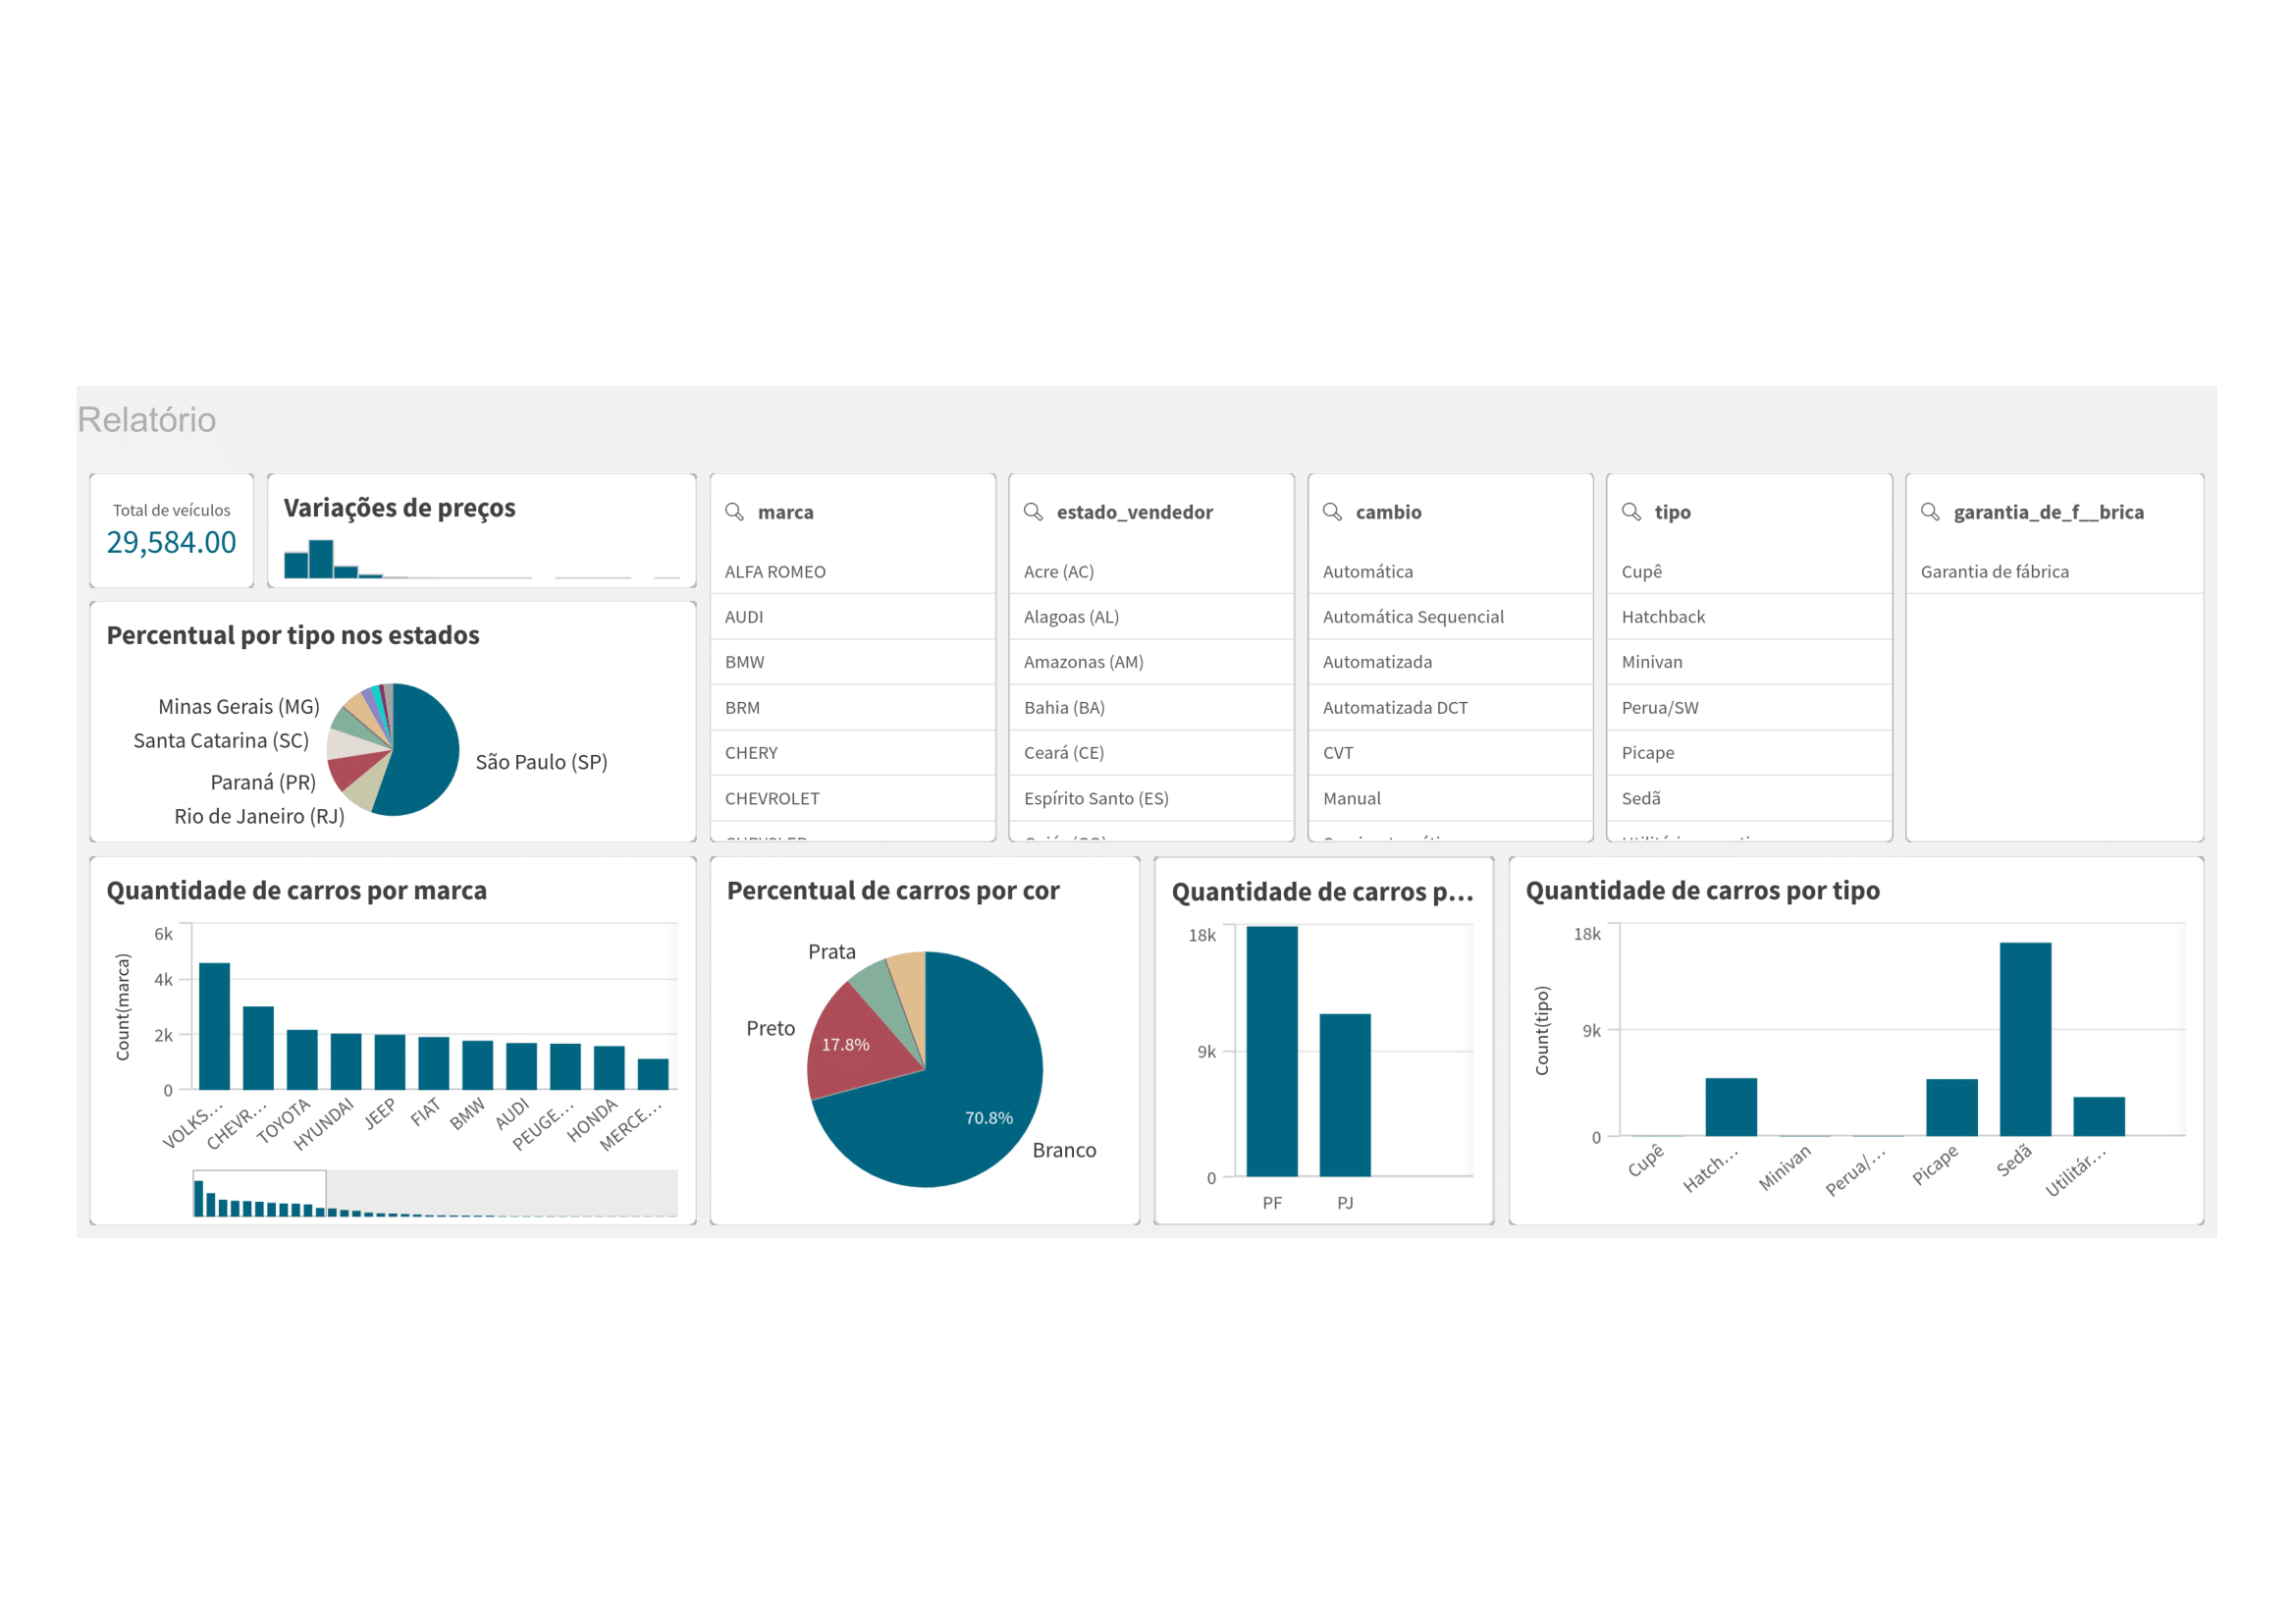

As principais estatísticas descritivas que eu escolhi foram:

O histograma pois por ele poderia coletar e estipular uma média de preço que pode ser útil pois por exemplo seleciono a marca Chevrolet, do tipo sedã no estado do RS, isso me trás uma frequência de quantas vezes ocorreram um devido preço sempre entre uma faixa e outra. Se comparado a outras regiões esse valor muda. Se utilizar mais filtros de consultas conseguimos encontrar valores mais acertívos pois podemos comparar também suas versões o que afinaria melhor para se ter um preço médio para quem sabe fazer uma campanha, uma promoção ou qualquer outra tomada de decisão.

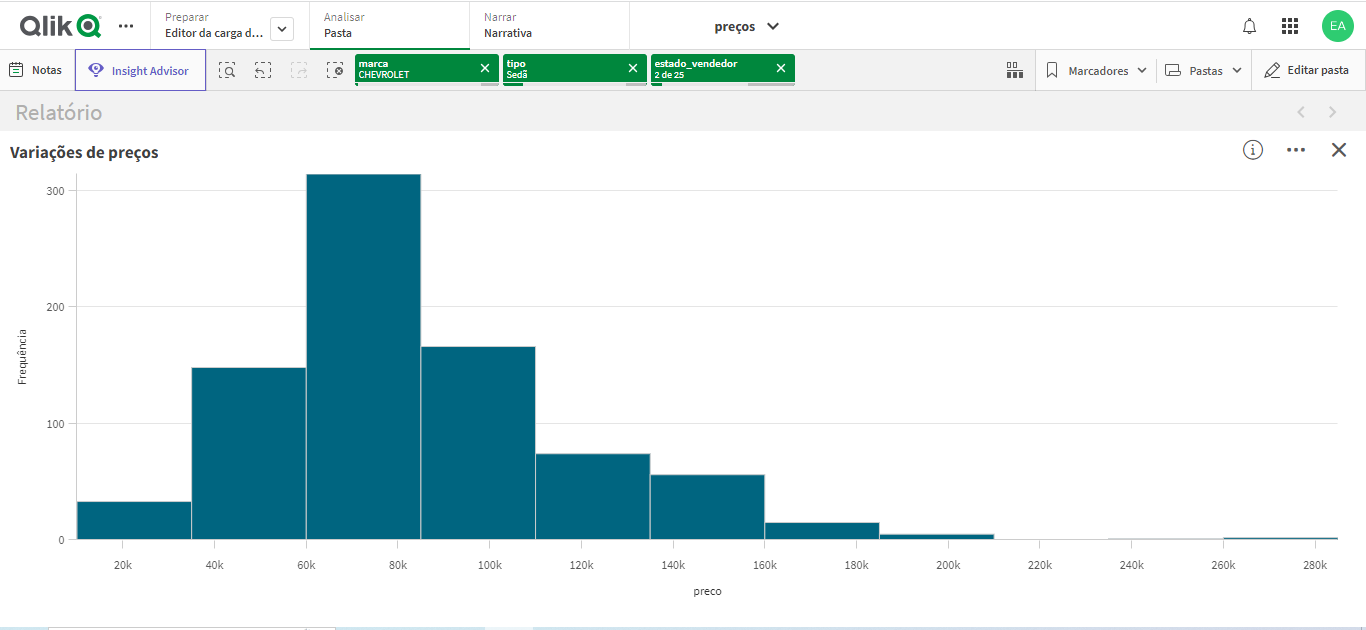

O Percentual de carros por cor, com ele podemos ver rápidamente as cores existentes de todos os veículos e ao definir um estado podemos descobrir quais cores mais vendem para tomar uma decisão. Conforme os dados podemos ver que não temos carros de cor azul ou amarelo mas temos dourado, cinza, prata, branco e preto, verde e vermelho. No estado do Acre por exemplo existe apenas 1 carro na cor preta e os demais todos são da cor branca baseado nisto, podemos ter um insight de que por lá não gostam de carros coloridos. Isso poderia ajudar a evitar gastos com marketing/propaganda para tentar vender carros de outras cores por exemplo, assim como também podem por ter tantos carros nessa mesma cor pode ser mais difícil de se vender já que existem muitas opções na cor branca.

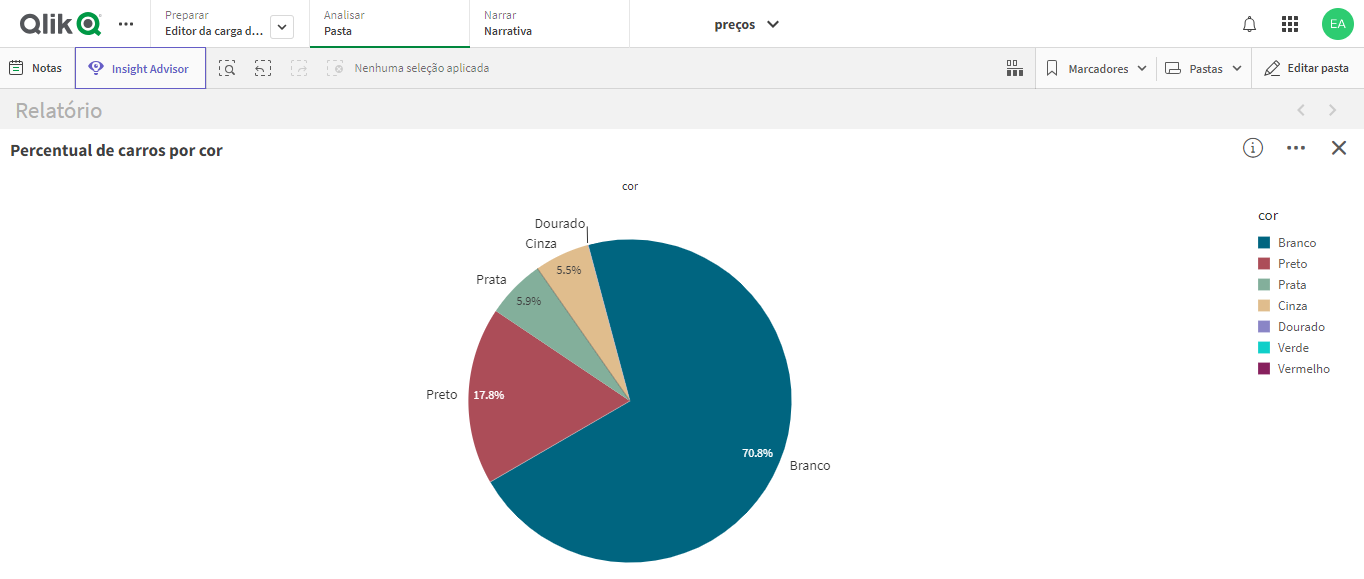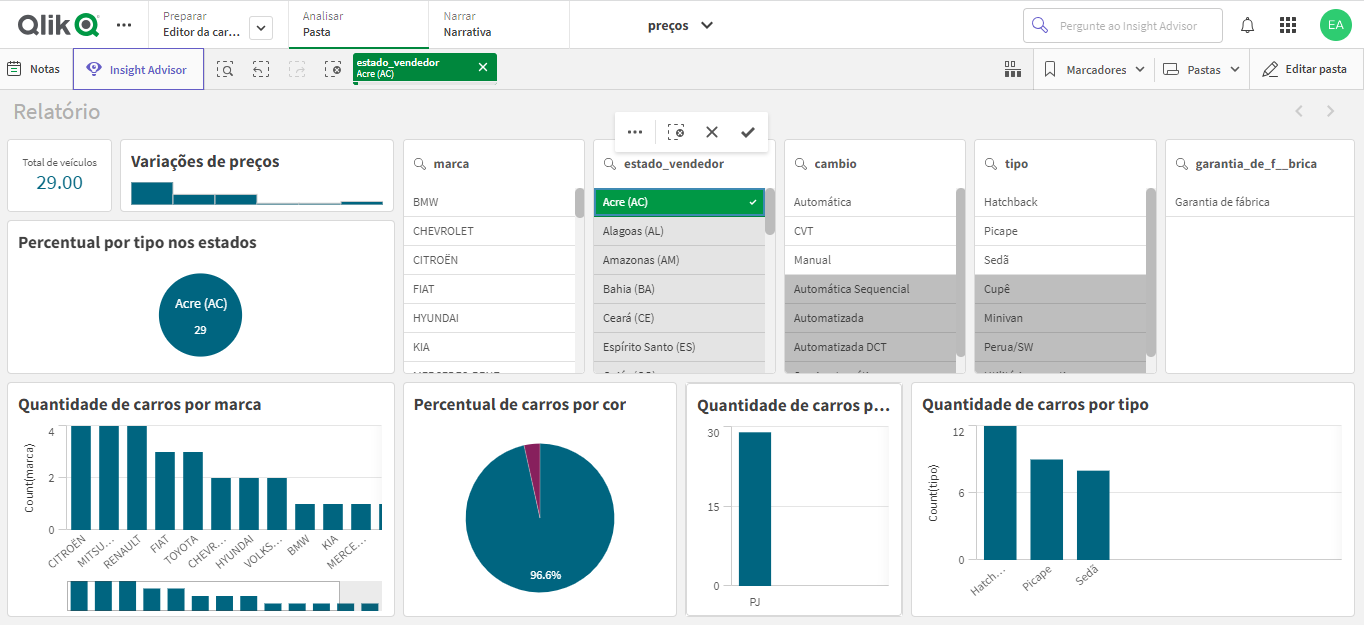

Gostei também do percentual por tipo de veículos por estado, onde podemos ver aonde se encontram os veículos com facilidade, assim com podemos ver pesquisar por determinado veículo e saber se ele existe em determinado estado. Vimos que de todos os estados, São Paulo ganha em quantidade de carros por marca a serem vendidos dos demais estados. Com isso podemos ter insights como por exemplo: você quer comprar qual marca de carro? Em São Paulo tem não importa qual ela seja.

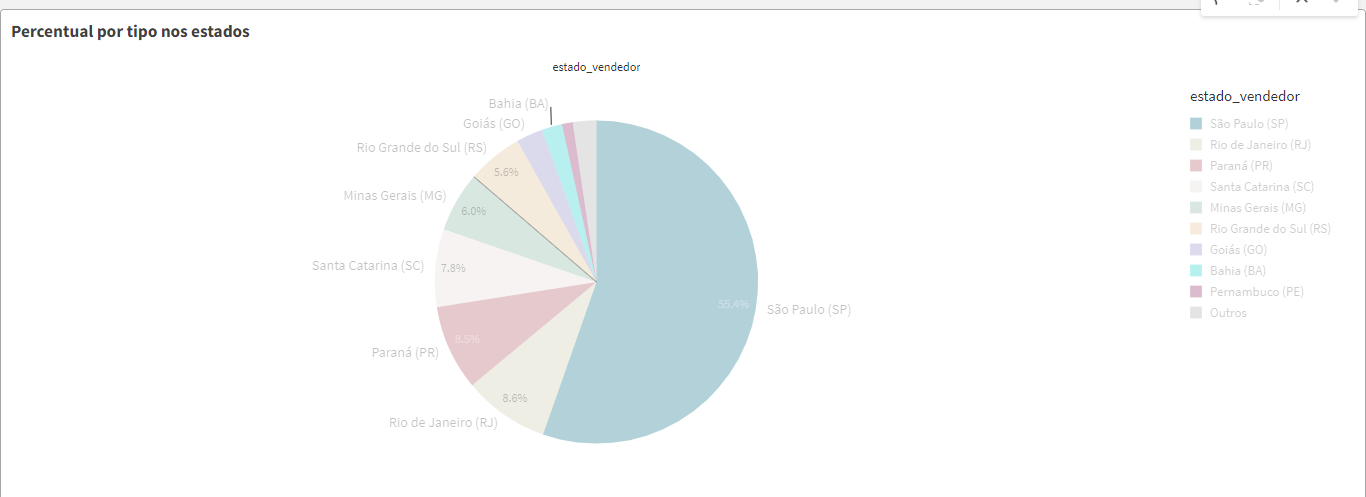

Por Ultimo acho interesante também saber a quantidade de carros por tipo, com ele podemos descobrir rápidamente quais são os tipos mais vendidos e podemos ver que o tipo mais vendido é o carro sedã com mais de 15 mil unidades a ser vendida assim como podemos ver que o carro menos vendido é a minivan com apenas 7 unidades a serem vendidas.

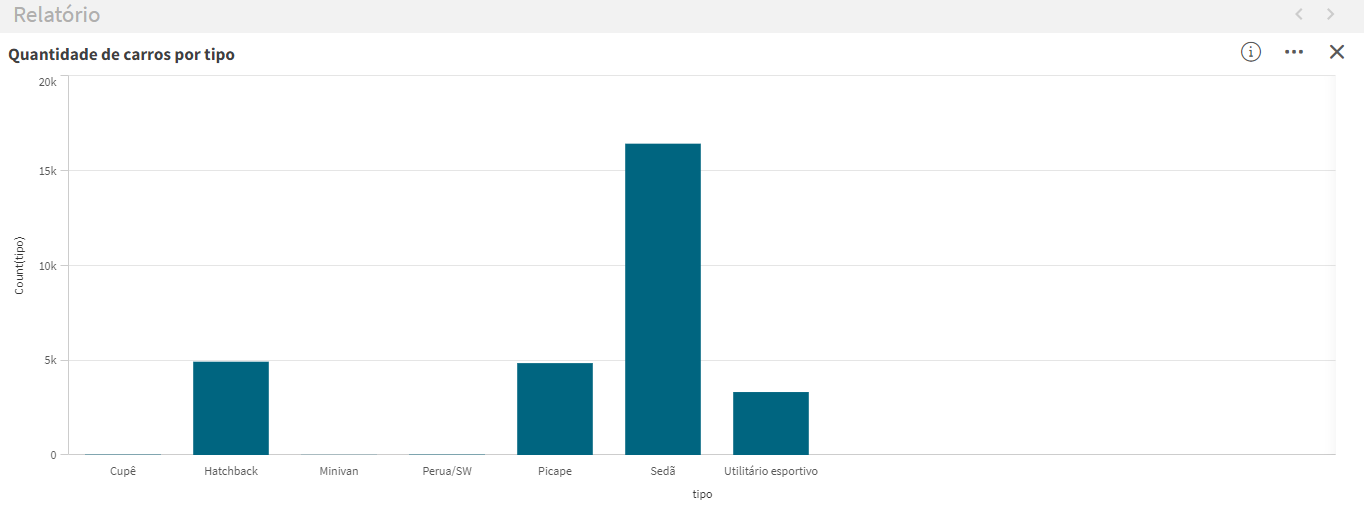

Respondendo as perguntas do desafio:

Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?
Buscando apenas carros com cambio manual, sendo os mais baratos e populares dentro das marcas como Chevrolet, Peugeot, Fiat, Renaut e Volskwagem, existem mais de 1800 carros a venda. Com isso eu acredito que se tem muitos carros a venda também existem muitos compradores por isso São Paulo é o melhor estado para se vender um carro.

Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?

O melhor estado para se comprar uma picape pra mim também seria São Paulo pois é a maior cidade onde contém os carros e por exemplo caso o cliente queira uma picape com transmissão automática na cor preta 91% dos carros nesta cor estão em São Paulo já em Minas, Acre, Alagoas e mais outros estados não tem.

Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

Para mim continua sendo São Paulo pois só lá possui mais de 2 mil carros para vender com esta garantia e acredito que com tantas opções o cliente consegue encontrar o melhor carro por um preço mais justo devido a tantas opções de vandas, basta procurar fazer uma pesquisa de preços.

Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

Eu tentei fazer a previsão do preço através da análise preditiva utilizando montando 2 tabelas uma com 70% dos dados para treino e a outra com 30% dos dados para serem testados. Quanto as variáveis acredito que variável id e num_de_fotos não vai me trazer algum dado mensuravel apenas pode servir para alguma contagem mas não impacta no resultado da análise.
Eu utilizei as seguintes variáveis:
marca;
modelo;
versao;
ano_de_fabricacao;
cambio;
tipo;
tipo_vendedor;
cidade_vendedor;
estado_vendedor;
anunciante;
preco.
Achei que por este modelo seria o mais fácil de fazer a análise e que chegasse também o mais próximo do resultado com pelo menos 55 a 87% de acuraccy.

